In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import sys
sys.path.append('../')
import os
import time
import json
import pickle
import torch
import torchvision
import numpy as np
from pathlib import Path
from docopt import docopt
from datetime import datetime
import matplotlib.pyplot as plt
from src.modeling.meta_arch.build import build_model
from src.data.bengali_data import build_data_loader
from src.modeling.solver import build_optimizer, build_scheduler, build_evaluator, MixupAugmenter
# import configurations
from yacs.config import CfgNode as cfg
from src.config import get_cfg_defaults

# For Tensorboard integration
from torch.utils.tensorboard import SummaryWriter
from src.config.config import cfg
from src.data.bengali_data import BengaliDataBatchCollator, BengaliDataset
from torch.utils.data import Dataset, DataLoader


In [14]:
train_path = cfg.DATASET.TRAIN_DATA_PATH
val_path = cfg.DATASET.VAL_DATA_PATH

In [15]:
a = torch.FloatTensor([0.410, 0.405,  0.401]).view(3,1,1)

In [16]:
a.size()

torch.Size([3, 1, 1])

In [25]:
# DATA LOADER
train_data = pickle.load(open(train_path, 'rb'))
train_dataset = BengaliDataset(train_data, cfg.DATASET, True)

In [26]:
collator = BengaliDataBatchCollator()
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collator, num_workers=1)

In [27]:
train_itr = iter(train_loader)

In [ ]:
mean = [0.4, 0.2, 0.3]
a = torch.randn((16,3,128,128))
a

In [83]:
a.mean(1)[:,None,:,:][1]

tensor([[[ 0.1126, -0.5542, -0.4357,  ..., -0.2591, -1.4548,  1.4228],
         [ 0.7388, -0.3138, -0.0746,  ...,  1.0959, -0.8672, -0.6673],
         [ 0.2126,  0.3141, -0.6449,  ..., -0.0196, -0.3018, -0.9997],
         ...,
         [-0.4735, -0.3893,  0.4895,  ..., -0.1700, -0.0162,  0.4184],
         [-0.6458,  0.3566,  0.6127,  ..., -0.5565, -0.1463, -0.3117],
         [-0.2381, -0.6224,  0.0523,  ..., -0.2834,  0.8213, -0.7559]]])

In [31]:
solver_cfg = cfg.MODEL.SOLVER
mixup_augmenter = MixupAugmenter(solver_cfg.MIXUP)

In [32]:
inputs, labels = next(train_itr)
input_data, labels = mixup_augmenter(inputs, labels)
imgs = input_data.permute([0,2,3,1])
imgs = imgs.numpy()
imgs = ((imgs  * cfg.DATASET.NORMALIZE_STD)  + cfg.DATASET.NORMALIZE_MEAN) * 255
imgs= imgs.astype(np.uint8)



IndexError: index 6 is out of bounds for axis 0 with size 6

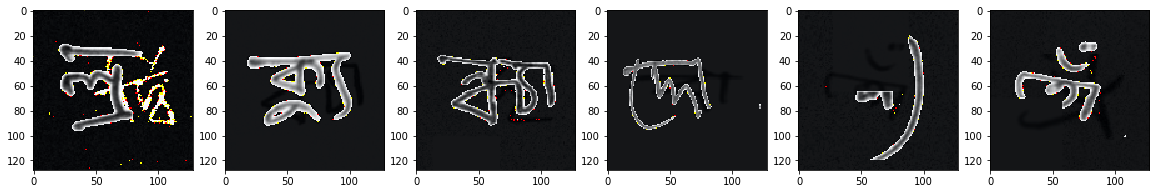

In [45]:
fig, axs = plt.subplots(1, 6, figsize=(20, 3))

for i,img in enumerate(imgs):
    axs[i].imshow(img)

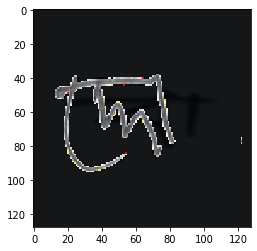

In [39]:
plt.imshow(imgs[])

In [11]:
import time
s = time.time()
for i in range(500):
    _ = next(itr)
t = time.time()
print(t-s)

17.256835222244263


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 128, 128])
torch.Size([3, 1, 1])
torch.Size([3, 128, 128])
tensor([[[1.3114, 1.3234, 1.2898],
         [1.3114, 1.3234, 1.2898],
         [1.2782, 1.2915, 1.2615],
         ...,
         [1.2782, 1.2915, 1.2615],
         [1.3197, 1.3314, 1.2968],
         [1.2865, 1.2995, 1.2685]],

        [[1.3114, 1.3234, 1.2898],
         [1.3114, 1.3234, 1.2898],
         [1.2533, 1.2676, 1.2402],
         ...,
         [1.2865, 1.2995, 1.2685],
         [1.3114, 1.3234, 1.2898],
         [1.3031, 1.3155, 1.2827]],

        [[1.3114, 1.3234, 1.2898],
         [1.3114, 1.3234, 1.2898],
         [1.2865, 1.2995, 1.2685],
         ...,
         [1.2865, 1.2995, 1.2685],
         [1.3114, 1.3234, 1.2898],
         [1.3031, 1.3155, 1.2827]],

        ...,

        [[1.3114, 1.3234, 1.2898],
         [1.3197, 1.3314, 1.2968],
         [1.3197, 1.3314, 1.2968],
         ...,
         [1.2948, 1.3075, 1.2756],
         [1.3114, 1.3234, 1.2898],
         [1.3197, 1.3314, 1.2968]],

    

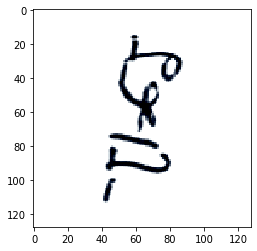

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
for i, (xb, yb) in enumerate(itr):
    if i == 5:
        print(xb.shape)
        mean=[0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        std = torch.FloatTensor(std).view(3,1,1)
        mt = torch.FloatTensor(mean).view(3,1,1)
        img = xb[0]
        print(mt.shape)
        print(img.shape)
        img *= mt
        img += std
        img = img.permute(2, 1, 0)
        print(img)
        plt.imshow(img)
#         print(img.shape)
#         print(inputs[0].shape)
        #im = Image.fromarray(img.cpu().detach().numpy())
#         #im = im.convert('RGB')
#         im.save("non_mixup_image.PNG")
        break

Wall time: 0 ns


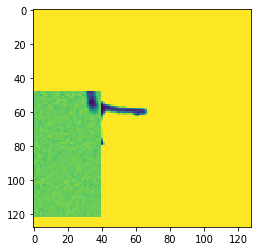

In [29]:
import matplotlib.pyplot as plt
%time 
for i, (xb, yb) in enumerate(itr):   
    #xb, yb = xb.to(device), yb = yb.to(device)
    
    xb, yb = cutmix(xb, yb[:,0], yb[:,1], yb[:,2], 1)
    
    plt.imshow(xb[1][2])
    
    if i == 1: break